In [1]:
import cv2


In [2]:
img=cv2.imread("/content/Y1.jpg")

In [3]:

print('wid:{} pixels'.format(img.shape[1])) 

wid:180 pixels


In [5]:
print('hei:{} pixels'.format(img.shape[0]))

hei:218 pixels


In [6]:
print('channels:{}'.format(img.shape[2]))

channels:3


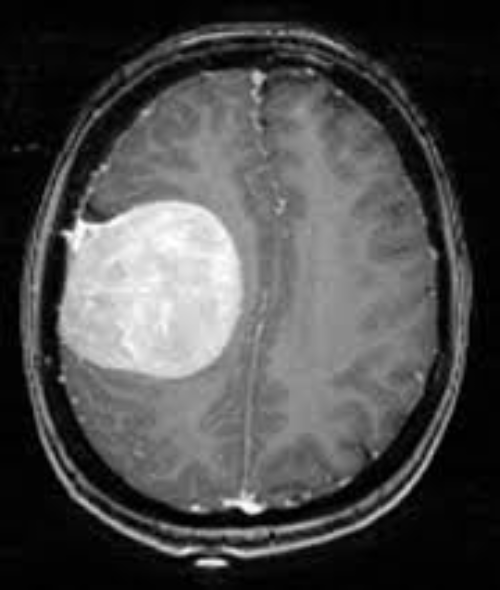

In [7]:

from google.colab.patches import cv2_imshow
dim=(500,590)
img=cv2.resize(img,dim)
cv2_imshow(img)



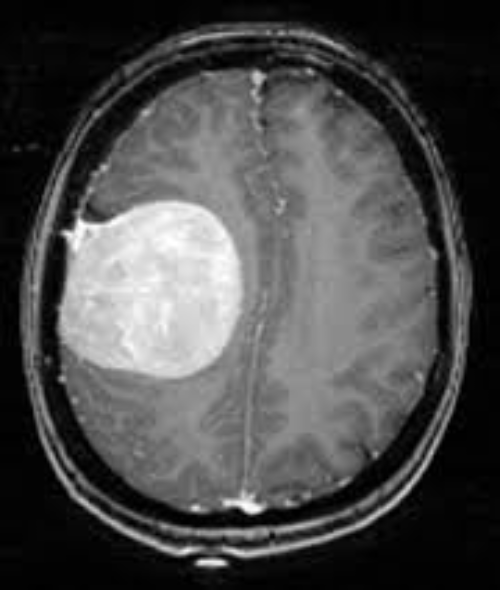

In [8]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY,0.7)
cv2_imshow(gray)

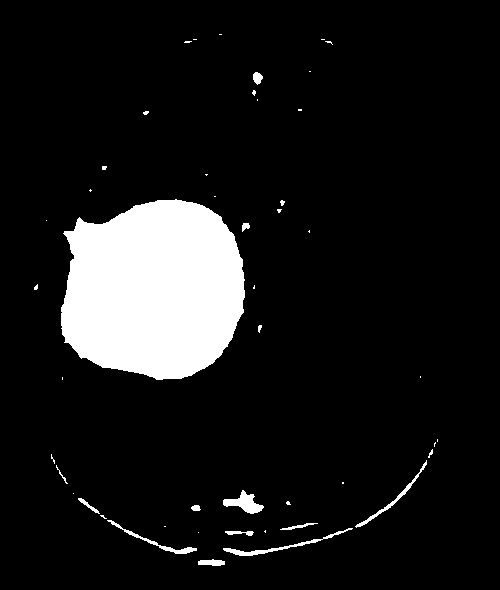

In [9]:
(T,thresh)=cv2.threshold(gray,155,255,cv2.THRESH_BINARY)
cv2_imshow(thresh)


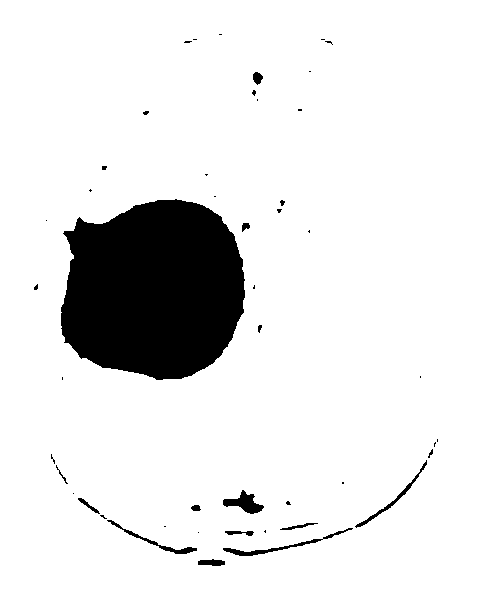

In [10]:
(T,threshInv)= cv2.threshold(gray,155,255,cv2.THRESH_BINARY_INV)
cv2_imshow(threshInv)


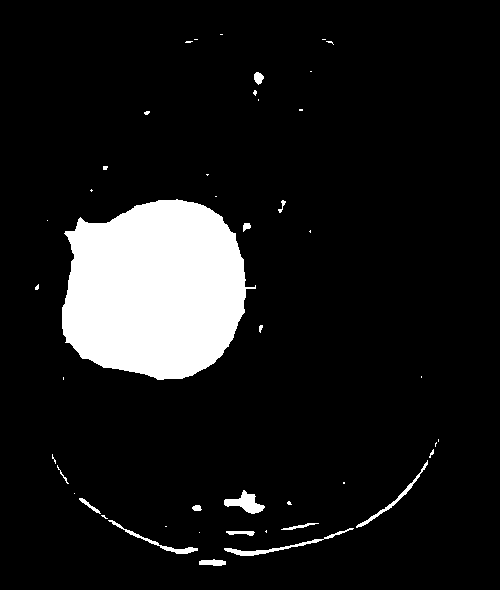

In [11]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10,5))
closed = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel)
cv2_imshow(closed)

In [12]:
closed=cv2.erode(closed,None,iterations=14)
closed=cv2.dilate(closed,None,iterations=13)

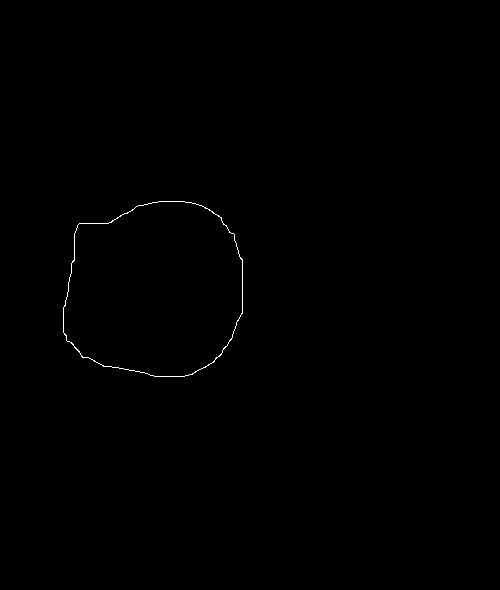

In [13]:


import numpy as np
def auto_canny(img,sigma=0.33):
  v=np.median(img)
  lower=int(max(0,(1.0-sigma)*v))
  upper=int(min(255,(1.0+sigma)*v))
  edged=cv2.Canny(img,lower,upper)
  return edged
canny=auto_canny(closed)
cv2_imshow(canny)  





#edged=cv2.Canny(img, lower, upper)
#canny=auto_canny(closed)

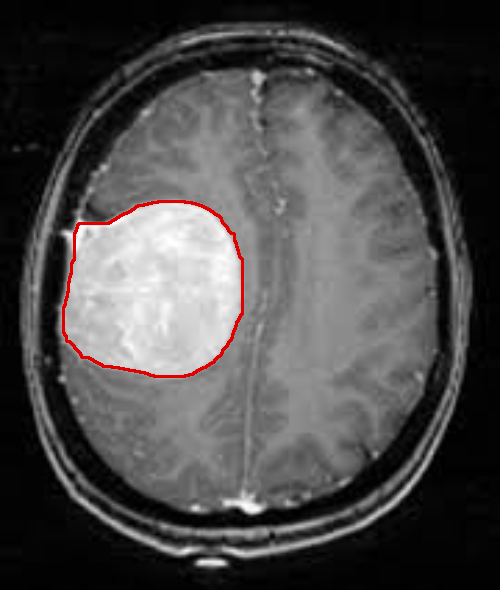

In [14]:
(cnts,_)=cv2.findContours(canny.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img,cnts,-1,(0,0,225),2)
cv2_imshow(img)
